In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [4]:
iris = load_iris(as_frame=True)
df = iris.data.copy()
df['species_n'] = [iris.target_names[label] for label in iris.target]
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_n
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species_n          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


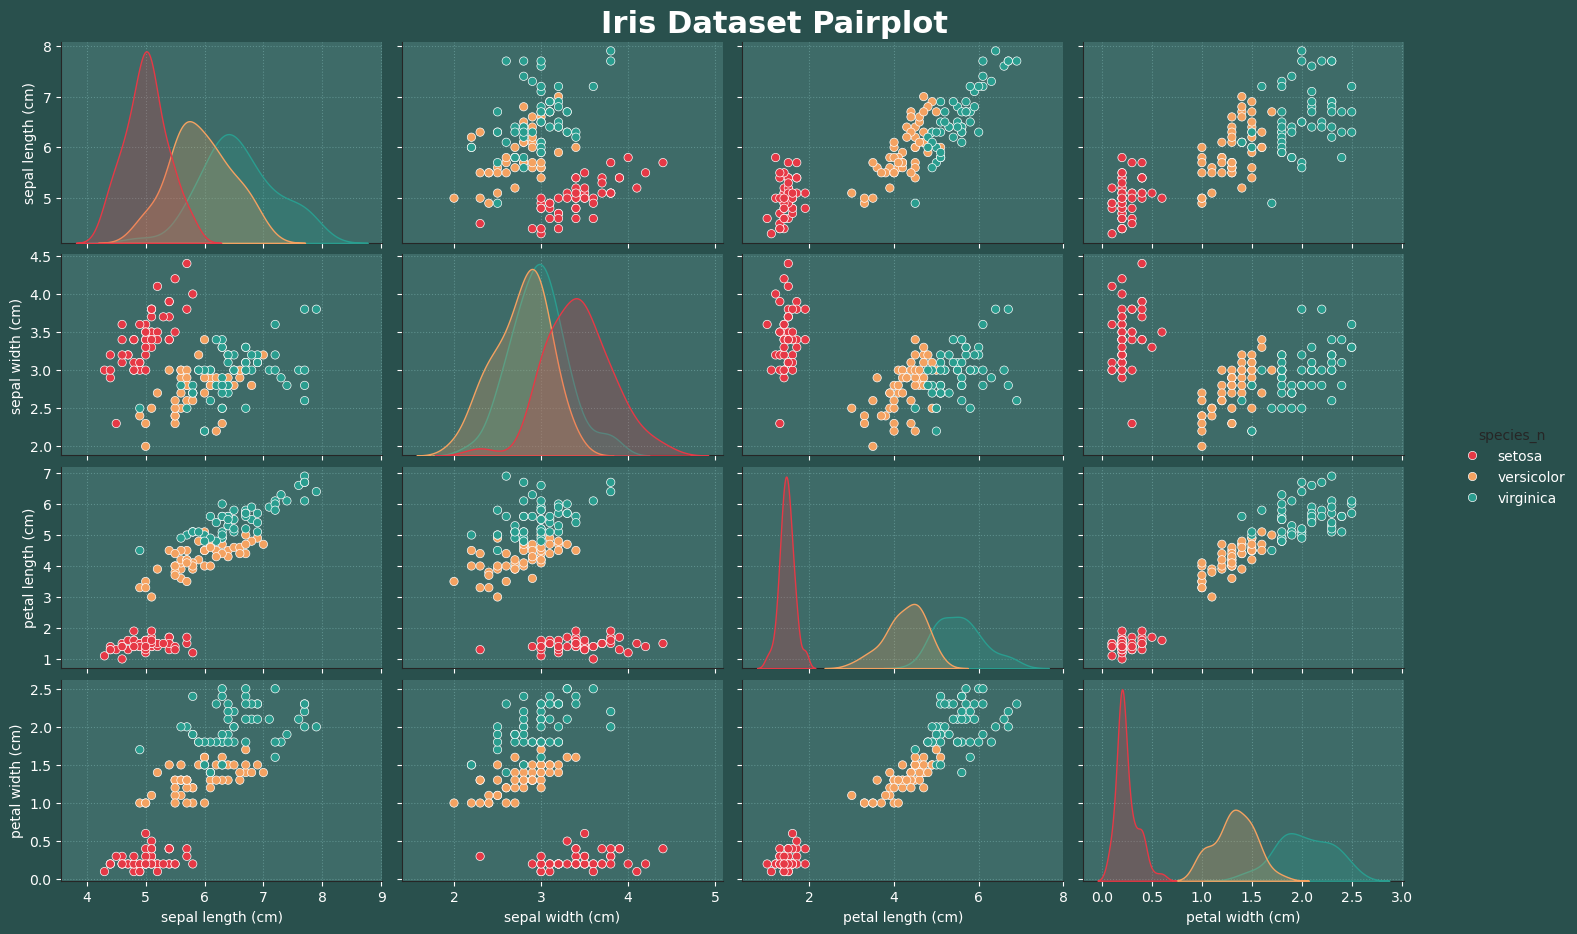

In [20]:
# Define colors
bg_color = "#29504D"  # Dark greenish-blue background
plot_color = "#3E6B68"  # Slightly lighter shade for plots
grid_color = "#5D8F8C"  # Subtle grid color
text_color = "white"  # White text for contrast
legend_bg = "#417A76"  # Softer contrast for legend background

# **New Palette**: Distinct, well-contrasting, and easy on the eyes
palette = ["#E63946", "#F4A261", "#2A9D8F"]  # Red, Warm Orange, and Teal

# Set Seaborn style
sns.set_style("ticks")

# Create the pairplot
g = sns.pairplot(df, hue="species_n", palette=palette, diag_kind="kde", height=3)

# Adjust figure size and background
g.fig.set_size_inches(16, 9)
g.fig.patch.set_facecolor(bg_color)  # Set the entire figure background

# Adjust the background and text for all subplots
for ax in g.axes.flatten():
    ax.set_facecolor(plot_color)  # Set plot background
    ax.grid(color=grid_color, linestyle="dotted")  # Subtle dotted grid
    
    # Set labels and ticks color
    ax.xaxis.label.set_color(text_color)
    ax.yaxis.label.set_color(text_color)
    ax.tick_params(colors=text_color)

# Adjust legend appearance
legend = g._legend
plt.setp(legend.get_texts(), color=text_color)  # Change legend text color

# Add title
g.fig.suptitle("Iris Dataset Pairplot", fontsize=22, color=text_color, weight="bold", y=1.02)

plt.show()

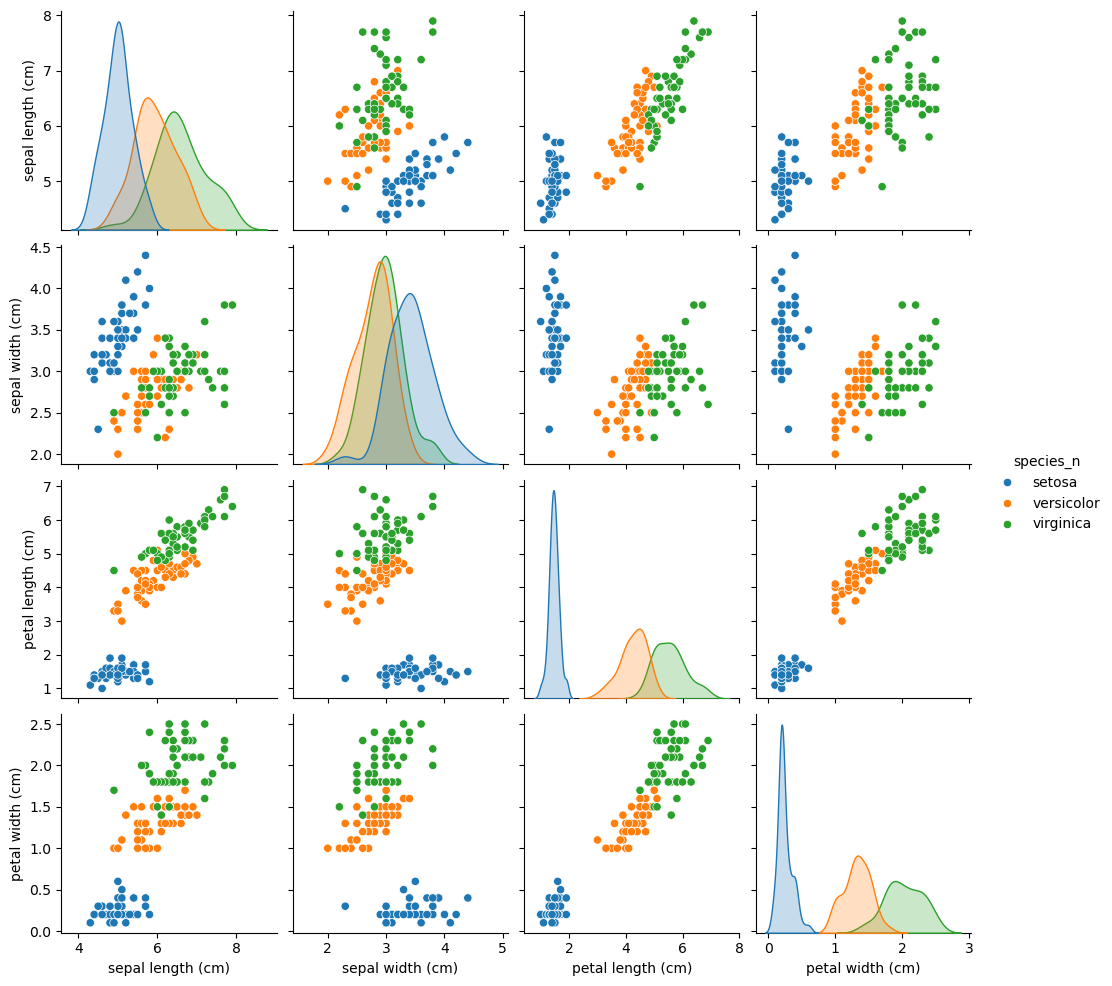

In [5]:
sns.pairplot(df, hue='species_n')

<Axes: xlabel='species_n', ylabel='count'>

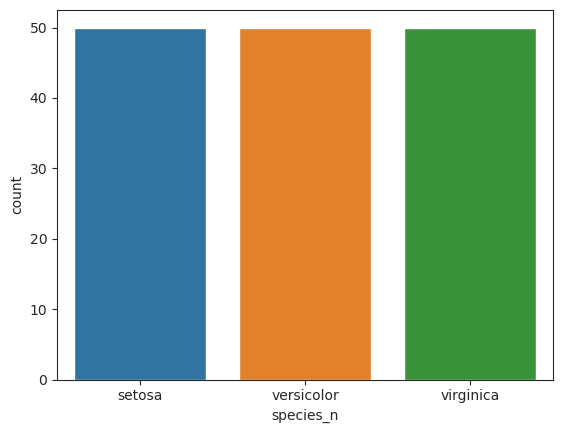

In [21]:
sns.countplot(x=df.species_n, hue=df.species_n)

In [7]:
# Splitting the data
features = iris.data
target = iris.target
X_train, X_tv, y_train, y_tv = train_test_split(features, target, test_size=0.2,
                                                   stratify=target, random_state=7)

# Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_tv = scaler.transform(X_tv)

X_valid, X_test, y_valid, y_test = train_test_split(X_tv, y_tv, test_size=0.5,
                                                   stratify=y_tv, random_state=7)



In [18]:
model_multinomial = LogisticRegression(multi_class="multinomial" ,tol=0 , max_iter=1000)
model_multinomial.fit(X_train, y_train)

model_ovr = LogisticRegression(multi_class="ovr" ,tol=0 , max_iter=1000)
model_ovr.fit(X_train, y_train)

/home/amado/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/amado/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', tol=0)

In [19]:
y_tv_pred = model_multinomial.predict(X_tv)
accuracy = accuracy_score(y_tv, y_tv_pred)
print("accuracy:", accuracy)

print("classification_report for multinomial:")
print(classification_report(y_tv, y_tv_pred, target_names=iris.target_names))

y_tv_pred = model_ovr.predict(X_tv)
accuracy = accuracy_score(y_tv, y_tv_pred)
print("accuracy:", accuracy)

print("classification_report for ovr:")
print(classification_report(y_tv, y_tv_pred, target_names=iris.target_names))

accuracy: 1.0
classification_report for multinomial:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

accuracy: 0.9666666666666667
classification_report for ovr:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [20]:
y_valid_pred = model_multinomial.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print("accuracy:", accuracy)

print("classification_report for multinomial:")
print(classification_report(y_valid, y_valid_pred, target_names=iris.target_names))

y_valid_pred = model_ovr.predict(X_valid)
accuracy = accuracy_score(y_valid, y_valid_pred)
print("accuracy:", accuracy)

print("classification_report for ovr:")
print(classification_report(y_valid, y_valid_pred, target_names=iris.target_names))

accuracy: 1.0
classification_report for multinomial:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

accuracy: 0.9333333333333333
classification_report for ovr:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      0.80      0.89         5
   virginica       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



In [21]:
y_test_pred = model_multinomial.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("accuracy:", accuracy)

print("classification_report for multinomial:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

y_test_pred = model_ovr.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("accuracy:", accuracy)

print("classification_report for ovr:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))

accuracy: 1.0
classification_report for multinomial:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

accuracy: 1.0
classification_report for ovr:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         5
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         5

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

